In [35]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [37]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [38]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [39]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [40]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

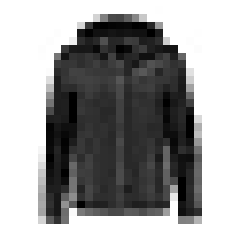

In [41]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [42]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [43]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

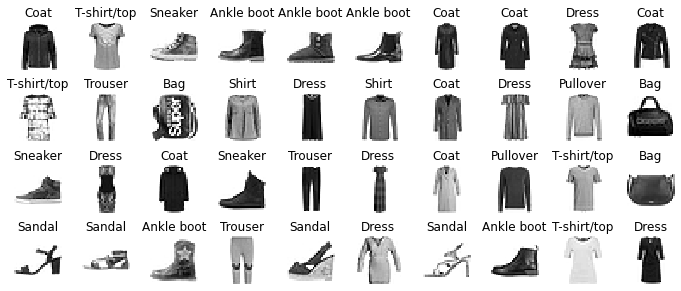

In [44]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [45]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [47]:
weights

array([[-0.03023075, -0.0575783 , -0.00954967, ...,  0.01707353,
        -0.05080394,  0.03039919],
       [-0.05594556, -0.0501955 ,  0.03902177, ...,  0.06310339,
         0.05823036,  0.02002426],
       [-0.03384427,  0.0638098 ,  0.03509748, ..., -0.02273932,
         0.04900513,  0.03330628],
       ...,
       [-0.00677692,  0.04447412,  0.03799324, ...,  0.03317993,
         0.01690114, -0.06676963],
       [ 0.02097186,  0.03880782,  0.03569867, ...,  0.01208708,
         0.00039962,  0.04468236],
       [ 0.0381    , -0.0641228 ,  0.07163946, ...,  0.04622258,
         0.01529388,  0.00439657]], dtype=float32)

In [48]:
print(weights.shape)

(784, 300)


In [49]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [51]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
  21/1719 [..............................] - ETA: 8s - loss: 2.1220 - accuracy: 0.2024

2022-05-24 15:34:21.000042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7052 - accuracy: 0.7702

2022-05-24 15:34:29.255551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.7052 - accuracy: 0.7702 - val_loss: 0.5208 - val_accuracy: 0.8214
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4842 - accuracy: 0.8305 - val_loss: 0.4352 - val_accuracy: 0.8534
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4396 - accuracy: 0.8436 - val_loss: 0.5751 - val_accuracy: 0.7858
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4135 - accuracy: 0.8555 - val_loss: 0.3965 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3955 - accuracy: 0.8619 - val_loss: 0.3777 - val_accuracy: 0.8682
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.3748 - val_accuracy: 0.8704
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3653 - accuracy: 0.8707 - val_loss: 0.3659 - val_accuracy: 0.8728
Ep

In [52]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [53]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

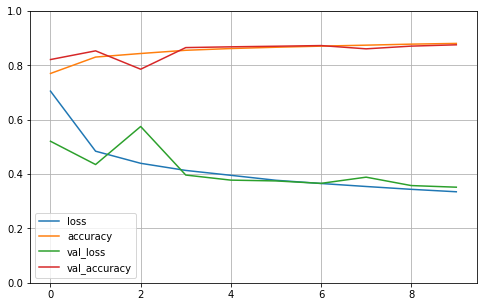

In [55]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3858 - accuracy: 0.8608


[0.3858453929424286, 0.86080002784729]

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2022-05-24 15:35:51.611803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.  , 0.89],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [58]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [59]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

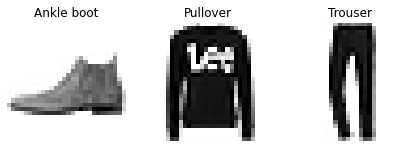

In [60]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

Activation function:  relu 


Epoch 1/5
  21/1719 [..............................] - ETA: 8s - loss: 2.1308 - accuracy: 0.2173

2022-05-24 15:40:59.386105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1717/1719 [============================>.] - ETA: 0s - loss: 0.7032 - accuracy: 0.7689

2022-05-24 15:41:08.832493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7031 - accuracy: 0.7689 - val_loss: 0.5126 - val_accuracy: 0.8266
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4856 - accuracy: 0.8298 - val_loss: 0.4328 - val_accuracy: 0.8516
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4413 - accuracy: 0.8450 - val_loss: 0.5339 - val_accuracy: 0.8006
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4144 - accuracy: 0.8558 - val_loss: 0.3944 - val_accuracy: 0.8646
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3954 - accuracy: 0.8622 - val_loss: 0.3782 - val_accuracy: 0.8674


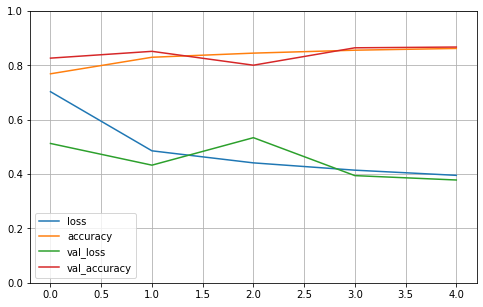

Activation function:  elu 


Epoch 1/5
  13/1719 [..............................] - ETA: 14s - loss: 2.1233 - accuracy: 0.2163

2022-05-24 15:41:48.247914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1717/1719 [============================>.] - ETA: 0s - loss: 0.6525 - accuracy: 0.7796

2022-05-24 15:42:02.533582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 15s 9ms/step - loss: 0.6524 - accuracy: 0.7797 - val_loss: 0.5060 - val_accuracy: 0.8274
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4779 - accuracy: 0.8309 - val_loss: 0.4349 - val_accuracy: 0.8496
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4427 - accuracy: 0.8430 - val_loss: 0.4985 - val_accuracy: 0.8130
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4221 - accuracy: 0.8514 - val_loss: 0.4070 - val_accuracy: 0.8606
Epoch 5/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4080 - accuracy: 0.8559 - val_loss: 0.3939 - val_accuracy: 0.8648


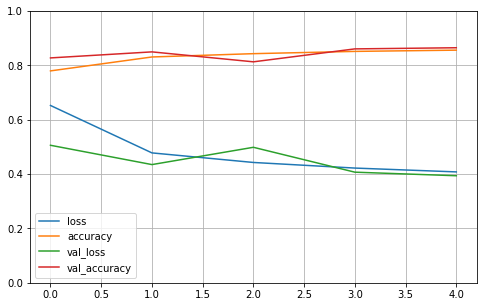

Activation function:  LeakyReLU 


Epoch 1/5
  10/1719 [..............................] - ETA: 9s - loss: 2.1608 - accuracy: 0.1688  

2022-05-24 15:43:04.702548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.6987 - accuracy: 0.7669

2022-05-24 15:43:14.199417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.6987 - accuracy: 0.7669 - val_loss: 0.5140 - val_accuracy: 0.8252
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4895 - accuracy: 0.8278 - val_loss: 0.4424 - val_accuracy: 0.8502
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4491 - accuracy: 0.8420 - val_loss: 0.5353 - val_accuracy: 0.8026
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4259 - accuracy: 0.8507 - val_loss: 0.4083 - val_accuracy: 0.8606
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4101 - accuracy: 0.8560 - val_loss: 0.3937 - val_accuracy: 0.8620


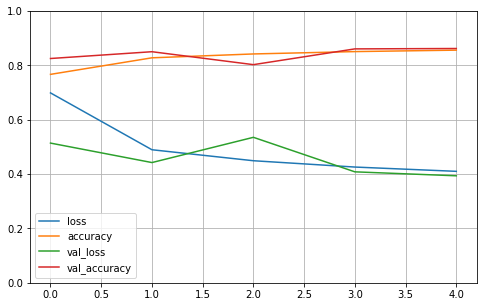

In [64]:
import pandas as pd
from sklearn import  metrics

act_fun = ["relu", "elu","LeakyReLU"]

dfs = []

for activation in act_fun:
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation=activation),
        keras.layers.Dense(100, activation=activation),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

    print("Activation function: ",activation,'\n\n')

    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

    dfs.append(pd.DataFrame(history.history))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Zad. 
Stwórz wykres porównujący metody. 

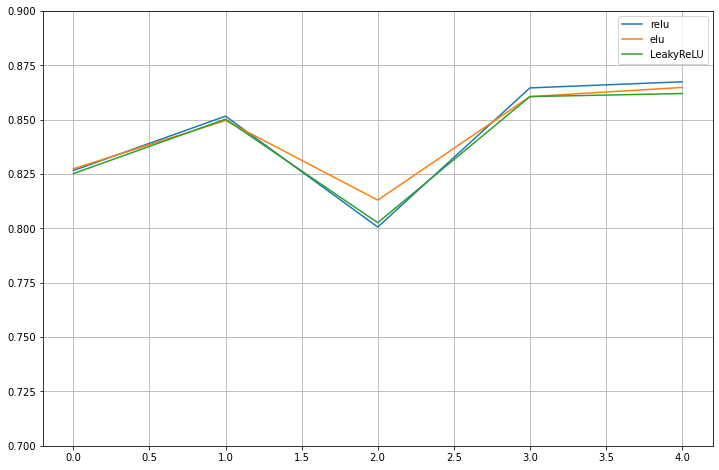

In [65]:
plt.figure(figsize=(12, 8))
dfs.append(pd.DataFrame(history.history))

for df,fun in zip(dfs,act_fun):
    df['val_accuracy'].plot(label = fun)
    plt.grid(True)
    plt.gca().set_ylim(0.7, 0.9)

plt.legend()
plt.show()